In [39]:
import matplotlib.pyplot as plt
import numpy as np

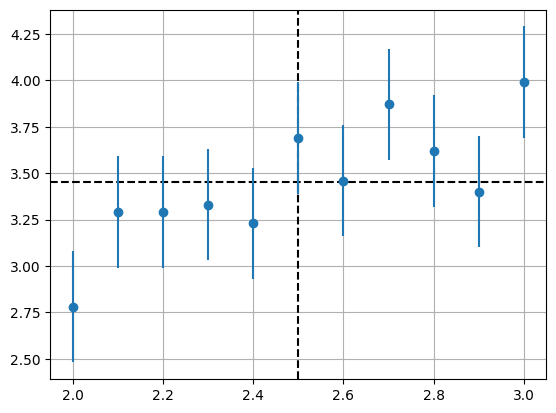

In [51]:
X = np.arange(2, 3.10, 0.10)
Y = np.array([2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99])
N = len(X)
Xm, Ym = np.mean(X), np.mean(Y)
plt.axhline(Ym, linestyle="dashed", color="k")
plt.axvline(Xm, linestyle="dashed", color="k")
plt.errorbar(X,Y, fmt='o', yerr=0.3)
plt.grid()

In [44]:
cov_mat = np.cov(X, Y)

VX, VY, VXY = cov_mat[0,0], cov_mat[1,1], cov_mat[0, 1]

print(VX, VY, VXY)

0.1100000000000002 0.11200000000000006 0.08790000000000009
